In [ ]:
##importing the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import zipfile
import io
import os
import shutil
import pathlib
%matplotlib inline

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from io import BytesIO
from zipfile import ZipFile

In [1]:
#Code for activating the JSON File
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tejagottam","key":"cf91ad43117fead6599068e051138465"}'}

In [2]:
#creating the folder, copying the .kaggle and giving permissions


!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [3]:
#downloading dogs-vs-cats dataset
!kaggle competitions download -c dogs-vs-cats

100% 810M/812M [00:25<00:00, 40.0MB/s]
100% 812M/812M [00:25<00:00, 33.0MB/s]


In [4]:
#unzipping the dogs-vs-cats dataset
!unzip dogs-vs-cats.zip

Archive:  dogs-vs-cats.zip
  inflating: sampleSubmission.csv    
  inflating: test1.zip               
  inflating: train.zip               


In [5]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dog.5499.jpg      
  inflating: train/dog.55.jpg        
  inflating: train/dog.550.jpg       
  inflating: train/dog.5500.jpg      
  inflating: train/dog.5501.jpg      
  inflating: train/dog.5502.jpg      
  inflating: train/dog.5503.jpg      
  inflating: train/dog.5504.jpg      
  inflating: train/dog.5505.jpg      
  inflating: train/dog.5506.jpg      
  inflating: train/dog.5507.jpg      
  inflating: train/dog.5508.jpg      
  inflating: train/dog.5509.jpg      
  inflating: train/dog.551.jpg       
  inflating: train/dog.5510.jpg      
  inflating: train/dog.5511.jpg      
  inflating: train/dog.5512.jpg      
  inflating: train/dog.5513.jpg      
  inflating: train/dog.5514.jpg      
  inflating: train/dog.5515.jpg      
  inflating: train/dog.5516.jpg      
  inflating: train/dog.5517.jpg      
  inflating: train/dog.5518.jpg      
  inflating: train/dog.5519.jpg      
  inflating: train/dog.552.jpg       

In [ ]:
#creating directories "training, testing and validation"
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")

new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)


make_subset("train", start_index=0, end_index=500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)


In [ ]:

import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)



Found 1000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# Checking the shape of images in the train_dataset
for images, labels in train_dataset.take(1):
    print(f'Image batch shape: {images.shape}')
    print(f'Label batch shape: {labels.shape}')


Image batch shape: (32, 150, 150, 3)
Label batch shape: (32, 1)


###1) Consider the Cats & Dogs example. Start initially with a training sample of 1000, avalidation sample of 500, and a test sample of 500 (like in the text). Use any techniqueto reduce overfitting and improve performance in developing a network that you trainfrom scratch. What performance did you achieve?

###Model 1

In [ ]:
#building model 1 with filters ranging from 32 to 256 by maxpooling operation

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,313 (4.05 MB)

 Trainable params: 1,061,313 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5052 - loss: 7.7059 - val_accuracy: 0.5080 - val_loss: 0.7037
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 68s 2s/step - accuracy: 0.5133 - loss: 0.7130 - val_accuracy: 0.5160 - val_loss: 0.6936
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 79s 2s/step - accuracy: 0.5512 - loss: 0.6879 - val_accuracy: 0.5780 - val_loss: 0.6816
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step - accuracy: 0.6217 - loss: 0.6715 - val_accuracy: 0.5240 - val_loss: 0.7016
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 67s 2s/step - accuracy: 0.5423 - loss: 0.6725 - val_accuracy: 0.5620 - val_loss: 0.6672
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6083 - loss: 0.6607 - val_accuracy: 0.5940 - val_loss: 0.6671
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.6130 - loss: 0.6527 - val_accuracy: 0.5680 - val_loss: 0.6674
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.6474 - loss: 0.6135 - val_accuracy: 0.5940 - val_loss:

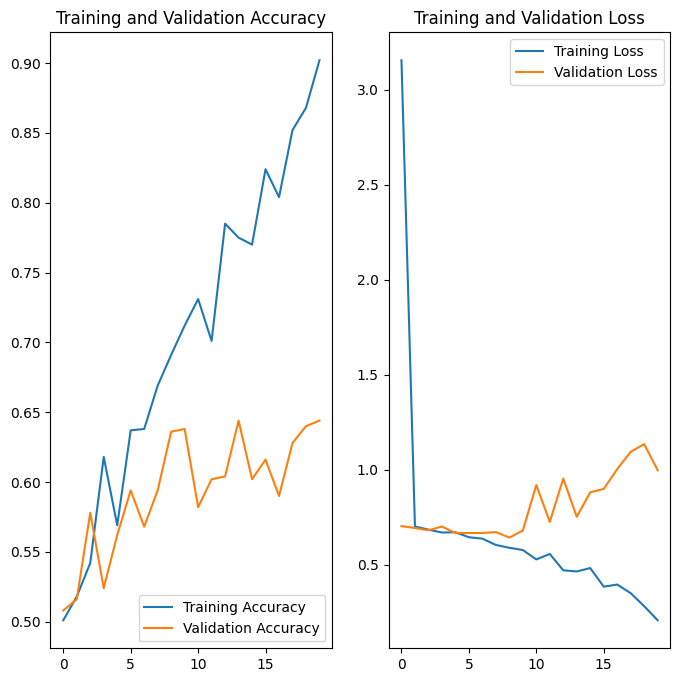

In [ ]:
#visualizing results
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



In [ ]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 16s 1s/step - accuracy: 0.6293 - loss: 0.9755
Test Accuracy: 64.00%
Test Loss: 0.9952


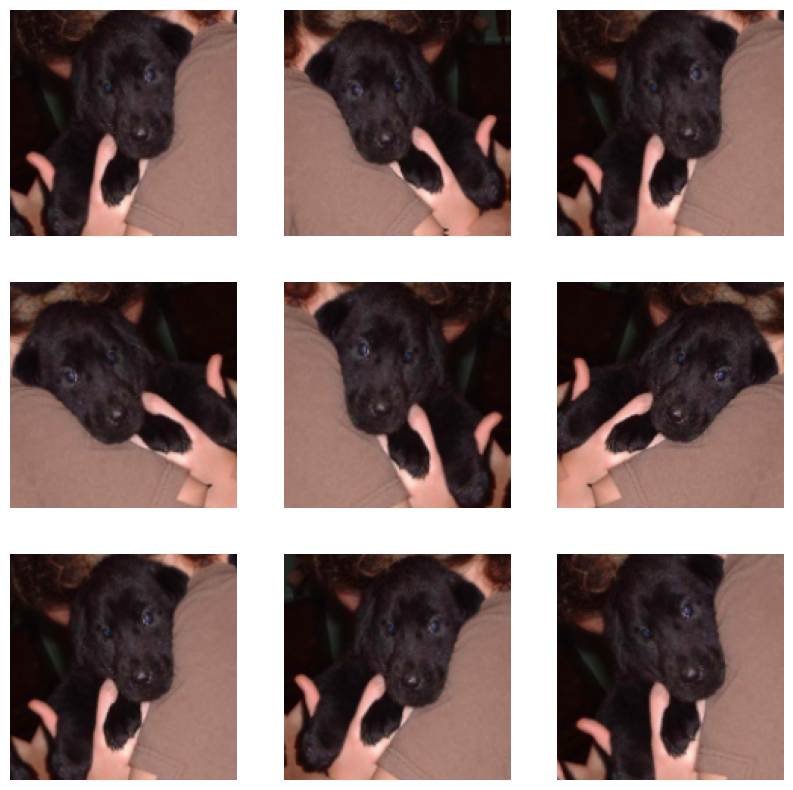

In [ ]:
#avoiding overfitting
from tensorflow.keras import layers

data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

plt.figure(figsize=(10, 10))
for images, _ in train_dataset.take(1):
   for i in range(9):
      augmented_images = data_augmentation(images)
      ax = plt.subplot(3, 3, i + 1)
      plt.imshow(augmented_images[0].numpy().astype("uint8"))
      plt.axis("off")

###Model 2

In [ ]:
#building the model 2 with increase in layers from 32 to 512 by maxpooling the operation and considering dropout rate as 0.5

from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 75, 75, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 37, 37, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 37, 37, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 18, 18, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 9, 9, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │       4,194,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,763,905 (21.99 MB)

 Trainable params: 5,763,905 (21.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 157s 2s/step - accuracy: 0.5314 - loss: 2.2971 - val_accuracy: 0.5060 - val_loss: 0.6828
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.5504 - loss: 0.6829 - val_accuracy: 0.5920 - val_loss: 0.6717
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 160s 3s/step - accuracy: 0.5499 - loss: 0.6922 - val_accuracy: 0.6080 - val_loss: 0.6542
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.5816 - loss: 0.6742 - val_accuracy: 0.5420 - val_loss: 0.6724
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 156s 2s/step - accuracy: 0.5660 - loss: 0.6873 - val_accuracy: 0.6260 - val_loss: 0.6622
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.6017 - loss: 0.6625 - val_accuracy: 0.6400 - val_loss: 0.6461
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 145s 2s/step - accuracy: 0.6141 - loss: 0.6543 - val_accuracy: 0.5100 - val_loss: 0.6952
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 204s 2s/step - accuracy: 0.5809 - loss: 0.6722 - val_accuracy: 0.5400 - v

In [ ]:
#evaluating model on test set
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.5384 - loss: 1.0589
Test Accuracy: 52.80%
Test Loss: 1.0578


###after comparing the two models we can clearly see that accuracy of model 1 is greater than the accuracy of model 2.

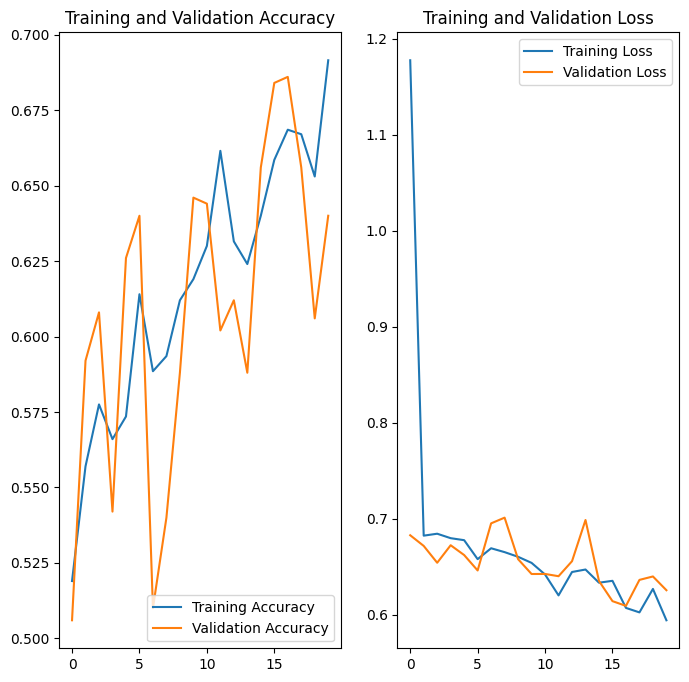

In [ ]:
#visualizing the model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



##Model 3

In [ ]:
##building model 3 by maxpooling operations with increase in filters from 32 to 512 and dropout rate as 0.5
from tensorflow.keras import layers, models


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)


Epoch 1/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.4891 - loss: 20.7031 - val_accuracy: 0.5080 - val_loss: 0.6904
Epoch 2/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 211s 3s/step - accuracy: 0.5195 - loss: 0.6907 - val_accuracy: 0.5000 - val_loss: 0.7176
Epoch 3/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 210s 3s/step - accuracy: 0.5459 - loss: 0.6898 - val_accuracy: 0.6240 - val_loss: 0.6749
Epoch 4/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 221s 4s/step - accuracy: 0.5715 - loss: 0.6881 - val_accuracy: 0.6260 - val_loss: 0.6572
Epoch 5/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 253s 3s/step - accuracy: 0.6203 - loss: 0.6635 - val_accuracy: 0.6040 - val_loss: 0.6643
Epoch 6/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 217s 3s/step - accuracy: 0.6264 - loss: 0.6547 - val_accuracy: 0.6320 - val_loss: 0.6268
Epoch 7/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 213s 3s/step - accuracy: 0.6287 - loss: 0.6442 - val_accuracy: 0.6460 - val_loss: 0.6209
Epoch 8/20
63/63 ━━━━━━━━━━━━━━━━━━━━ 220s 3s/step - accuracy: 0.6706 - loss: 0.6039 - val_accuracy: 0.5720 - 

In [ ]:
#evaluating the model on test set
test_loss, test_acc = model.evaluate(test_dataset)

print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 12s 715ms/step - accuracy: 0.5063 - loss: 7.9697
Test Accuracy: 50.00%
Test Loss: 8.1763


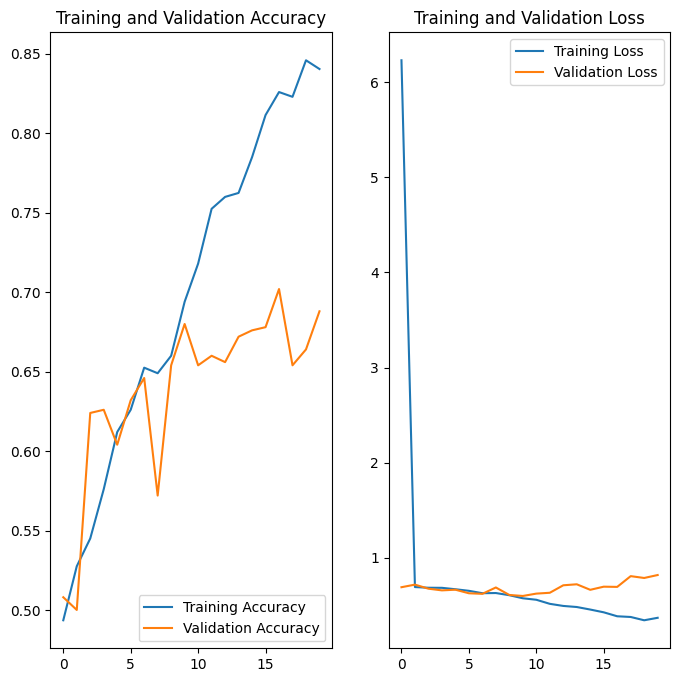

In [ ]:
#visualizing the model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


###Model 4

In [ ]:

from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(1024, (3, 3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.6))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)                   │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 9, 9, 1024)          │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 4, 4, 1024)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 16384)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 512)                 │       8,389,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,660,225 (55.92 MB)

 Trainable params: 14,660,225 (55.92 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=20,
    validation_data=validation_dataset
)

Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 326s 10s/step - accuracy: 0.5281 - loss: 94.3153 - val_accuracy: 0.5000 - val_loss: 0.7071
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 378s 10s/step - accuracy: 0.5098 - loss: 0.7052 - val_accuracy: 0.5060 - val_loss: 0.6929
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 333s 10s/step - accuracy: 0.5188 - loss: 0.6948 - val_accuracy: 0.5020 - val_loss: 0.6930
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 374s 10s/step - accuracy: 0.5229 - loss: 0.7010 - val_accuracy: 0.5000 - val_loss: 0.6968
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 362s 11s/step - accuracy: 0.5143 - loss: 0.6925 - val_accuracy: 0.5020 - val_loss: 0.6944
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 338s 10s/step - accuracy: 0.5045 - loss: 0.6973 - val_accuracy: 0.5560 - val_loss: 0.6851
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 318s 10s/step - accuracy: 0.5382 - loss: 0.6917 - val_accuracy: 0.5020 - val_loss: 0.6846
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 327s 10s/step - accuracy: 0.5124 - loss: 0.6913 - val_accuracy: 0

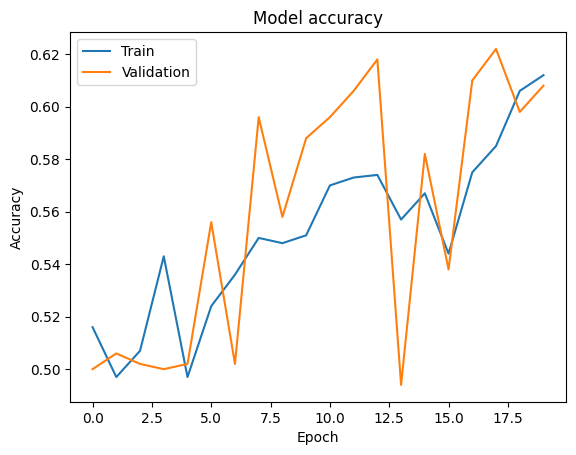

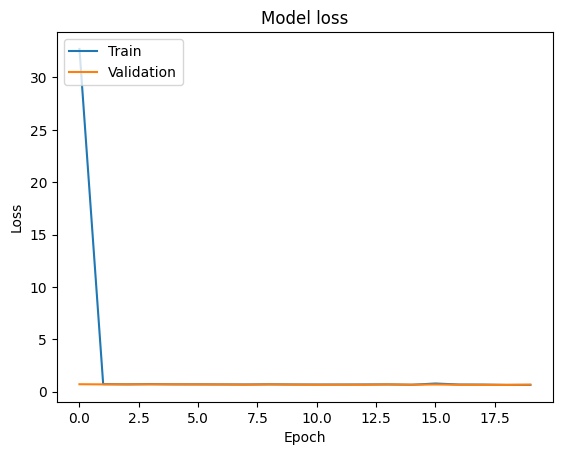

In [ ]:
#visualize the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
#evaluating model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.5909 - loss: 0.7679
Test accuracy: 0.5880
Test loss: 0.7973


###Conclusion: We have built 4 models with the training sample of 1000. let us compare 4 models by comparing accuracy and loss to know which model performed better

In [ ]:
Model_1 = (0.9755, 0.6293),
Model_2 = (1.0589, 0.5384)
Model_3 = (7.9697,0.5063)
Model_4 = (0.7679, 0.5909)

In [ ]:
Models = ("Mod_1","Mod_2","Mod_3","Mod_4")
Loss = (Model_1[0],Model_2[0],Model_3[0],Model_4[0])
Accuracy = (Model_1[1],Model_2[1],Model_3[1],Model_4[1])

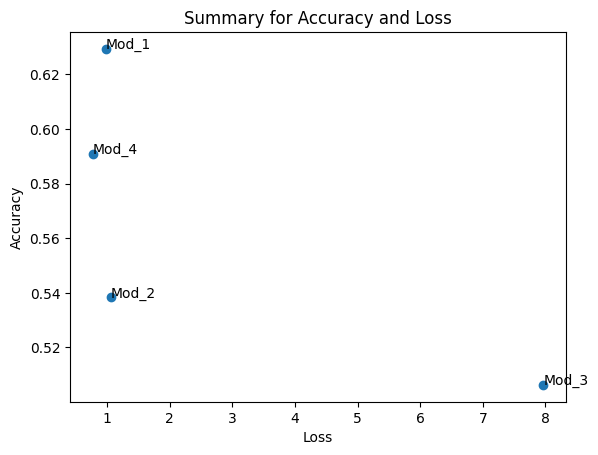

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Loss,Accuracy)
for i, txt in enumerate(Models):
    ax.annotate(txt, (Loss[i],Accuracy[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.show()

###Conclusion: from the above graph we can say that Model 1 is performing better compared to all the 4 models while Model 3 has the highest loss. so we can choose model 1 which has highest accuracy.

###2)Increase your training sample size. You may pick any amount. Keep the validation and test samples the same as above. Optimize your network (again training from scratch).What performance did you achieve?

In [ ]:
#considering training sample as 2000
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")

new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)


In [ ]:
##data preprocessing
train_dataset = image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_dataset = image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_dataset = image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
#viewing the size of the images
for data_batch, labels_batch in train_dataset:
    print("data batch shape:", data_batch.shape)
    print("labels batch shape:", labels_batch.shape)
    break

data batch shape: (32, 180, 180, 3)
labels batch shape: (32,)


In [ ]:
#viewing the size of the images
data_augmentation_1 = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.15),
        layers.RandomZoom(0.25)
    ]
)

###Model 5

In [ ]:

##building the model
from tensorflow.keras import layers, models

model = models.Sequential([

    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),

    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_35 (Conv2D)                   │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_36 (MaxPooling2D)      │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_37 (MaxPooling2D)      │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 18, 18, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_38 (MaxPooling2D)      │ (None, 9, 9, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_39 (Conv2D)                   │ (None, 7, 7, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_39 (MaxPooling2D)      │ (None, 3, 3, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_7 (Flatten)                  │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1024)                │       4,719,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │           1,025 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,289,217 (23.99 MB)

 Trainable params: 6,289,217 (23.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 111s 4s/step - accuracy: 0.5676 - loss: 0.6815 - val_accuracy: 0.5780 - val_loss: 0.6837
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


30/30 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.5392 - loss: 0.6893 - val_accuracy: 0.5680 - val_loss: 0.6766
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 27s 837ms/step - accuracy: 0.5910 - loss: 0.6806 - val_accuracy: 0.5920 - val_loss: 0.6725
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 118s 4s/step - accuracy: 0.6182 - loss: 0.6617 - val_accuracy: 0.5200 - val_loss: 0.6886
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.5356 - loss: 0.6990 - val_accuracy: 0.6300 - val_loss: 0.6756
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 32s 960ms/step - accuracy: 0.5991 - loss: 0.6812 - val_accuracy: 0.6600 - val_loss: 0.6719
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 113s 4s/step - accuracy: 0.5850 - loss: 0.6692 - val_accuracy: 0.5940 - val_loss: 0.6616
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 108s 4s/step - accuracy: 0.6129 - loss: 0.6675 - val_accuracy: 0.6140 - val_loss: 0.6616
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 31s 944ms/step - accuracy: 0.6118 - loss: 0.6543 - val_accuracy: 0.5740 - val_lo

In [ ]:
#evaluating the performance of the model on test dataset
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")

16/16 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.6657 - loss: 0.6267
Test accuracy: 0.6620000004768372


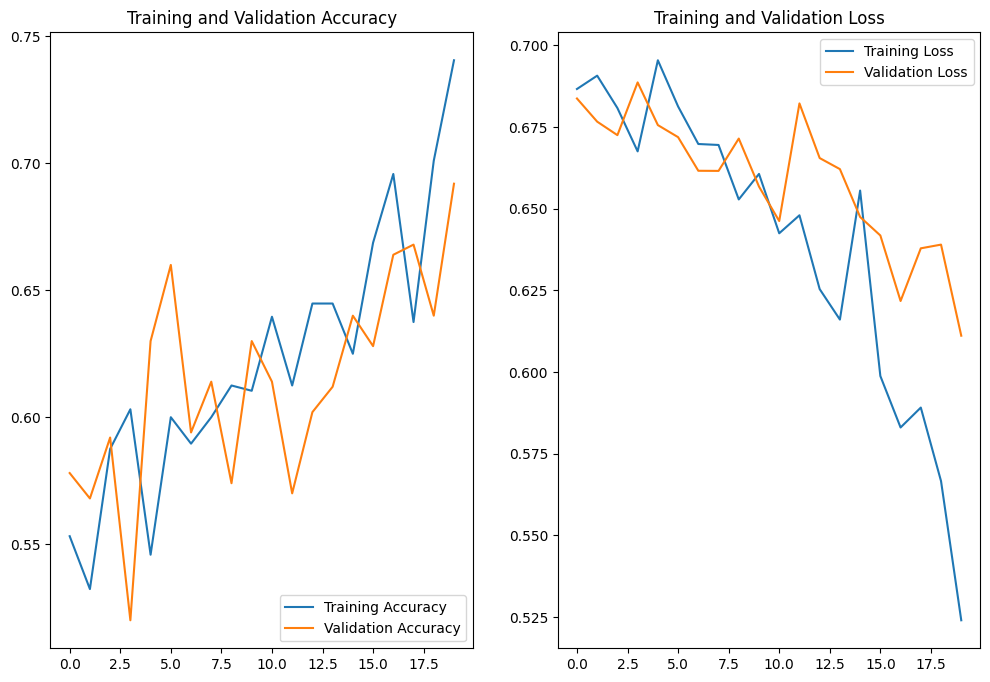

In [ ]:
##visualize the model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


###Model 6

In [ ]:
##building the model

import tensorflow as tf
from tensorflow.keras import layers, models


data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])


model = models.Sequential([
    layers.Input(shape=(180, 180, 3)),
    data_augmentation,

    layers.Conv2D(32, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(64, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),


    layers.Conv2D(128, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Conv2D(256, (3, 3), strides=(1, 1), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2), padding='same'),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),

    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()



Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_12 (Sequential)           │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_45 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_45 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_46 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_46 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_47 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_47 (MaxPooling2D)      │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_48 (Conv2D)                   │ (None, 23, 23, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_48 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_49 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_49 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 512)                 │       4,719,104 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,698,113 (21.74 MB)

 Trainable params: 5,698,113 (21.74 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=30,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 184s 6s/step - accuracy: 0.5373 - loss: 0.6928 - val_accuracy: 0.5300 - val_loss: 0.6907
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 173s 6s/step - accuracy: 0.5129 - loss: 0.6991 - val_accuracy: 0.5040 - val_loss: 0.6960
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.4948 - loss: 0.7019 - val_accuracy: 0.5100 - val_loss: 0.6892
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 222s 6s/step - accuracy: 0.5493 - loss: 0.6926 - val_accuracy: 0.5080 - val_loss: 0.6896
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 166s 6s/step - accuracy: 0.5200 - loss: 0.6933 - val_accuracy: 0.5560 - val_loss: 0.6806
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.6081 - loss: 0.6834 - val_accuracy: 0.5420 - val_loss: 0.6879
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 180s 6s/step - accuracy: 0.5745 - loss: 0.6791 - val_accuracy: 0.5740 - val_loss: 0.6737
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 168s 6s/step - accuracy: 0.5957 - loss: 0.6893 - val_accuracy: 0.5860 - val

In [ ]:
#evaluate the model performance
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32,
    label_mode="binary"
)

test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc * 100:.2f}%")

Found 500 files belonging to 2 classes.
16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.6370 - loss: 0.6624
Test accuracy: 61.20%


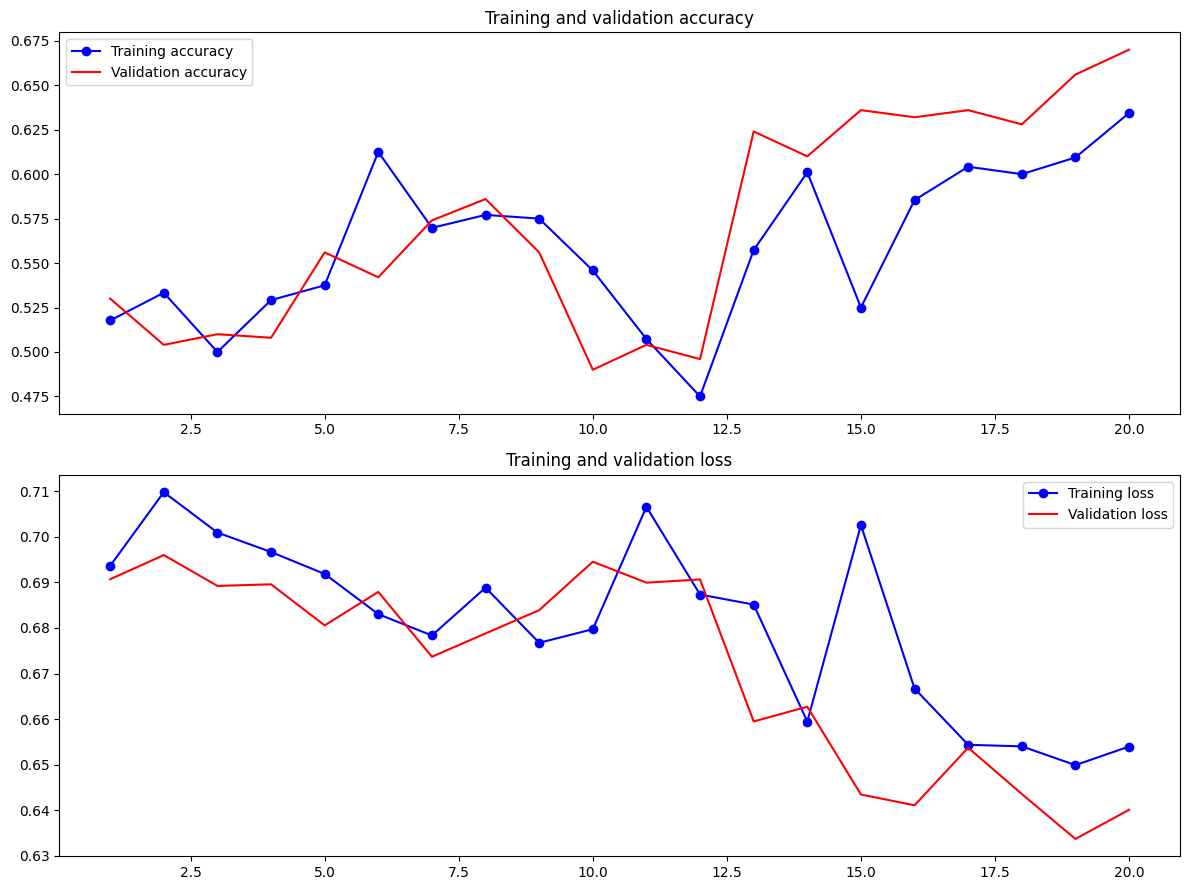

In [ ]:
#visualize the model
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12, 9))

plt.subplot(2, 1, 1)
plt.plot(epochs, acc, 'bo-', label='Training accuracy')
plt.plot(epochs, val_acc, 'r-', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(epochs, loss, 'bo-', label='Training loss')
plt.plot(epochs, val_loss, 'r-', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.tight_layout()
plt.show()


###Conclusion: We have built two more models with increase in filters from 1000 to 2000 and let us ccompare the three models ( Model 2, Model 5 and Model 6) to check which model performed better.

In [ ]:
Model_5 = (0.6624,0.6370)
Model_6 = (0.6267,0.6657)
Model_2 = (1.0589,0.5384)


In [ ]:
Models_2 = ("Mod_2","Mod_5","Mod_6")
Loss_2 = (Model_2[0],Model_5[0],Model_6[0])
Accuracy_2 = (Model_2[1],Model_5[1],Model_6[1])

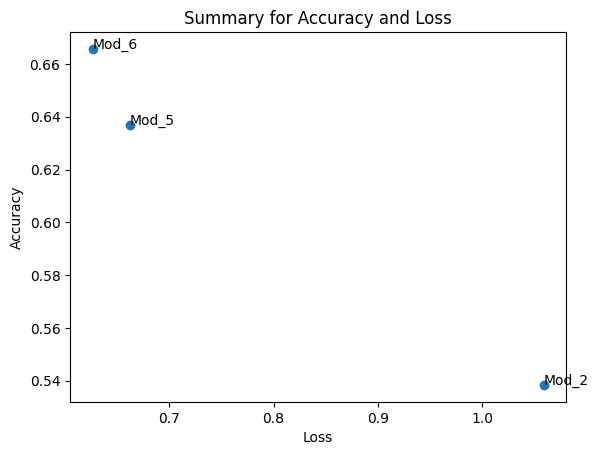

In [ ]:
fig, ax = plt.subplots()
ax.scatter(Loss_2,Accuracy_2)
for i, txt in enumerate(Models_2):
    ax.annotate(txt, (Loss_2[i],Accuracy_2[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

###Model_2 has the highest loss (1.0589) and lowest accuracy (0.5384), which indicates it's the least efficient model in terms of performance. Model_6 has the lowest loss (0.6267) and highest accuracy (0.6657), which makes it the best performing model among the three.Model_5 performs better than Model_2 but is slightly behind Model_6, with a loss of 0.6624 and accuracy of 0.6370.

##Based on these results, Model_6 is the best choice as it has the lowest loss and highest accuracy, making it the most optimal model for your task.

##3. Now change your training sample so that you achieve better performance than thosefrom Steps 1 and 2. This sample size may be larger, or smaller than those in the previoussteps. The objective is to find the ideal training sample size to get best predictionresults.


###Considering training sample as 3000

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")

new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

make_subset("train", start_index=0, end_index=1500)
make_subset("validation", start_index=1500, end_index=1750)
make_subset("test", start_index=1750, end_index=2000)


In [ ]:
import tensorflow as tf
from pathlib import Path

new_base_dir = Path("cats_vs_dogs_small")

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)


Found 3000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:
# Viewing the structure of the datasets

for images, labels in train_dataset.take(1):
    print("Shape of image batch:", images.shape)
    print("Shape of label batch:", labels.shape)
    print("Labels in batch:", labels.numpy())


Shape of image batch: (32, 150, 150, 3)
Shape of label batch: (32, 1)
Labels in batch: [[0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]]


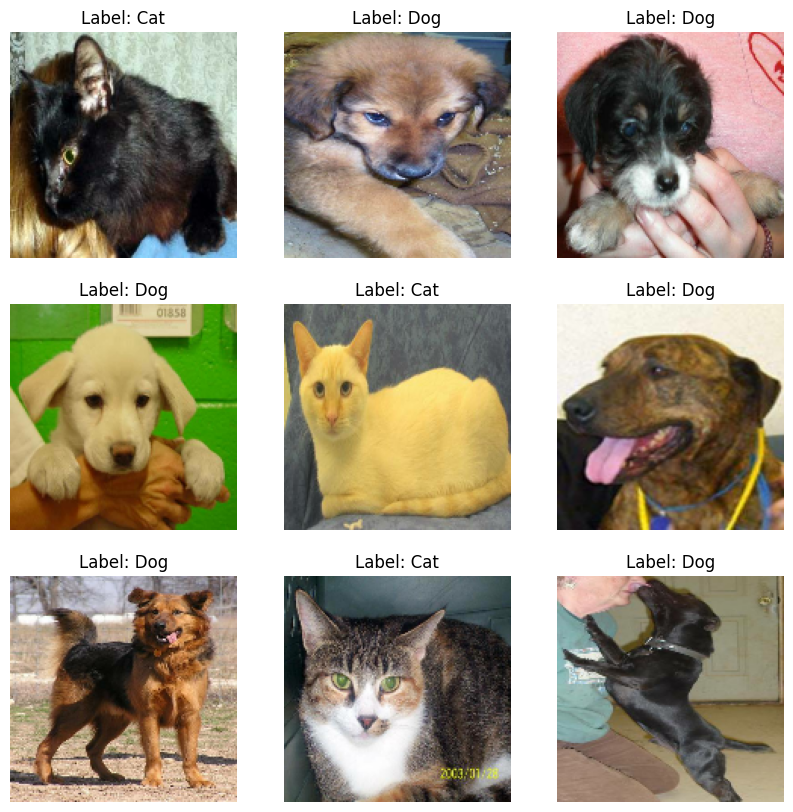

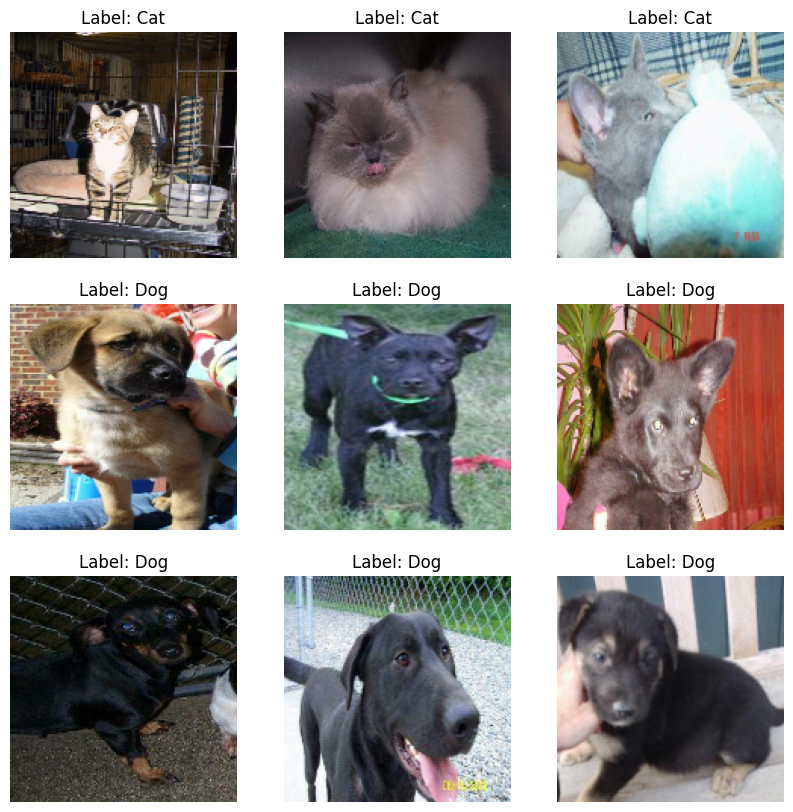

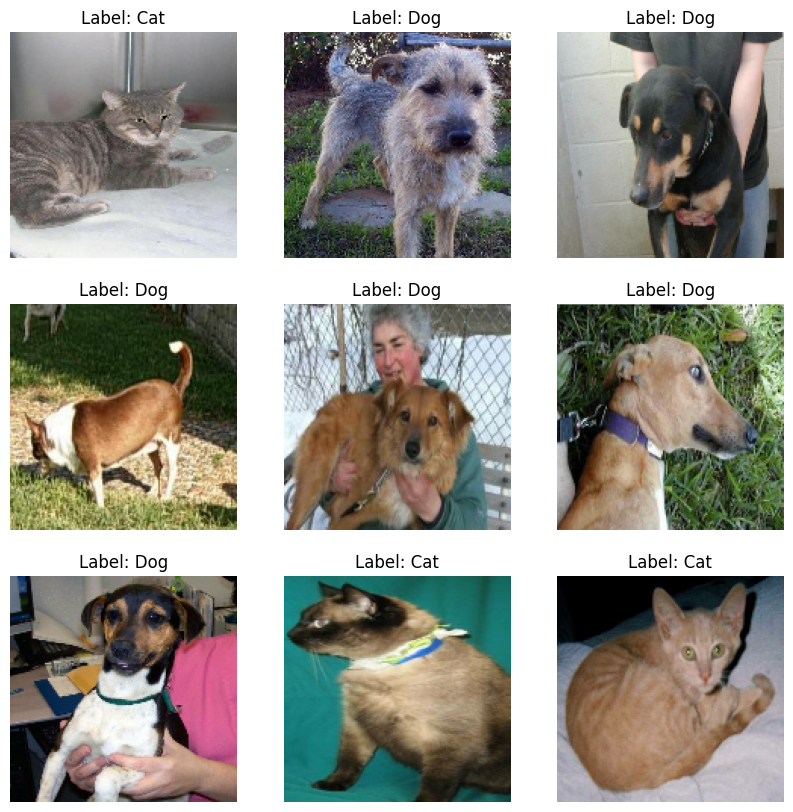

In [ ]:
import matplotlib.pyplot as plt


def display_images(dataset):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(9):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title("Label: " + ("Dog" if labels[i] else "Cat"))
            plt.axis("off")


display_images(train_dataset)

display_images(validation_dataset)

display_images(test_dataset)


###Model 7

In [ ]:

##building the model

import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,313 (4.05 MB)

 Trainable params: 1,061,313 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training hte model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.4759 - loss: 4.8014 - val_accuracy: 0.5760 - val_loss: 0.6878
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5112 - loss: 0.6956 - val_accuracy: 0.5880 - val_loss: 0.6827
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5736 - loss: 0.6827 - val_accuracy: 0.6060 - val_loss: 0.6672
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.5699 - loss: 0.6684 - val_accuracy: 0.5540 - val_loss: 0.6744
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.5946 - loss: 0.6715 - val_accuracy: 0.6100 - val_loss: 0.6589
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.6108 - loss: 0.6511 - val_accuracy: 0.6300 - val_loss: 0.6473
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6686 - loss: 0.6164 - val_accuracy: 0.6140 - val_loss: 0.6530
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 70s 2s/step - accuracy: 0.6313 - loss: 0.6491 - val_accuracy: 0.6580 - val_loss:

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, steps=50)
print(f"Test accuracy: {test_acc:.3f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.5933 - loss: 0.7854
Test accuracy: 0.590


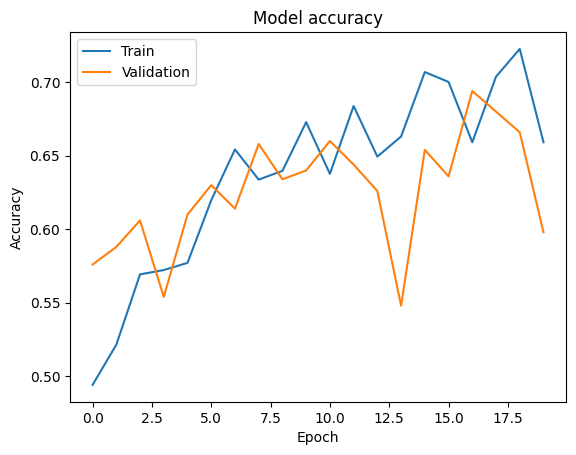

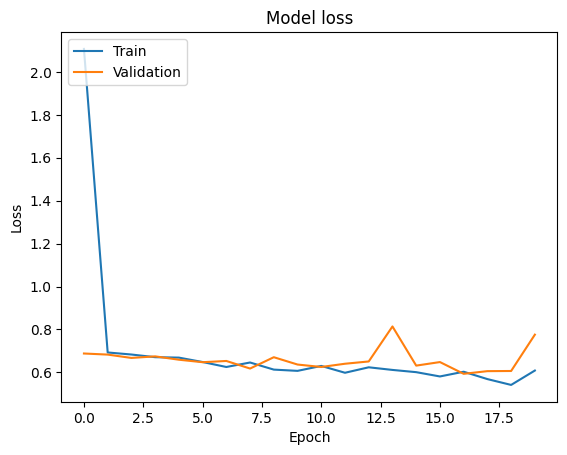

In [ ]:
#visualizing the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


###Model 8

In [ ]:

#building a model by combining maxpooling and strides with increase in filters from 32 to 256 in 5 inputlayers and dropout rate 0.5 with a training sample 3000.
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu', strides=(1,1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,313 (4.05 MB)

 Trainable params: 1,061,313 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)



Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5041 - loss: 6.4311 - val_accuracy: 0.5140 - val_loss: 0.6852
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 320ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5140 - val_loss: 0.6852
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 69s 2s/step - accuracy: 0.5299 - loss: 0.6852 - val_accuracy: 0.6100 - val_loss: 0.6730
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 273ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6100 - val_loss: 0.6730
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 78s 2s/step - accuracy: 0.6008 - loss: 0.6620 - val_accuracy: 0.5660 - val_loss: 0.6800
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 10s 321ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5660 - val_loss: 0.6800
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 121s 2s/step - accuracy: 0.5922 - loss: 0.6596 - val_accuracy: 0.6040 - val_loss: 0.6787
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6040 - val_loss: 0.6787
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.6336 - loss: 0.6453 - 

In [ ]:
#evaluate the model performance
test_loss, test_acc = model.evaluate(test_dataset, steps=50)  # 500 test samples / batch size of 32 = ~50 steps
print(f"Test accuracy: {test_acc:.3f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 11s 197ms/step - accuracy: 0.5886 - loss: 0.6605
Test accuracy: 0.594


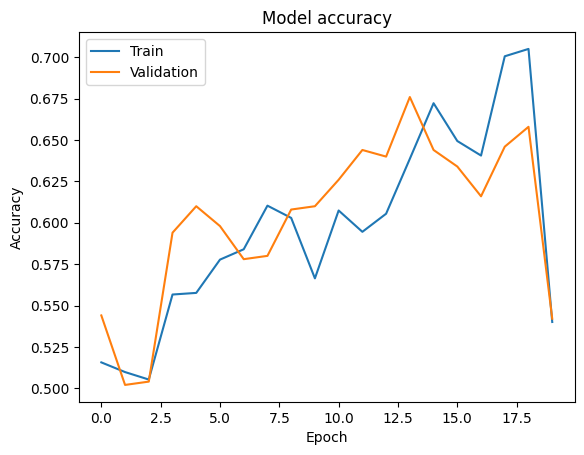

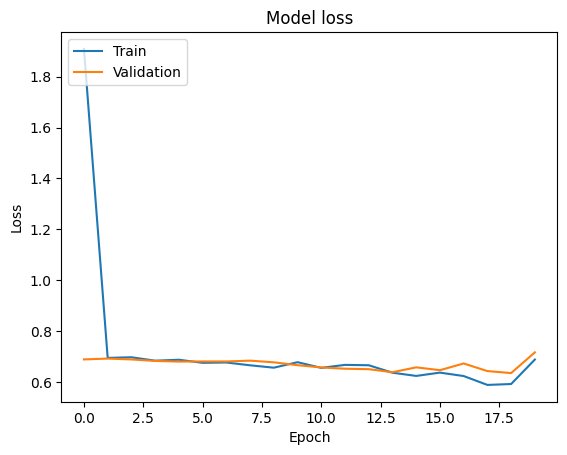

In [ ]:
#visualize the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
##model 9
import tensorflow as tf
from tensorflow.keras import layers, models

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3), strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(64, (3, 3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(128, (3, 3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(256, (3, 3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Conv2D(512, (3, 3), activation='relu', strides=(2,2), padding='same'))
model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=2, padding='same'))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 75, 75, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 38, 38, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 19, 19, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 10, 10, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 5, 5, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 2, 2, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 1, 1, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 1, 1, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,831,745 (6.99 MB)

 Trainable params: 1,831,745 (6.99 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=50
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.5272 - loss: 1.9027

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 376ms/step - accuracy: 0.5267 - loss: 1.8787 - val_accuracy: 0.5000 - val_loss: 0.6919
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 403ms/step - accuracy: 0.5198 - loss: 0.6883 - val_accuracy: 0.5080 - val_loss: 0.6930
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 402ms/step - accuracy: 0.5002 - loss: 0.6907 - val_accuracy: 0.5080 - val_loss: 0.7613
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 14s 438ms/step - accuracy: 0.5585 - loss: 0.6793 - val_accuracy: 0.5940 - val_loss: 0.6760
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 11s 326ms/step - accuracy: 0.5667 - loss: 0.6746 - val_accuracy: 0.5180 - val_loss: 0.6942
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 390ms/step - accuracy: 0.5602 - loss: 0.6796 - val_accuracy: 0.5420 - val_loss: 0.6818
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 22s 563ms/step - accuracy: 0.6014 - loss: 0.6594 - val_accuracy: 0.6260 - val_loss: 0.6572
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 394ms/step - accuracy: 0.6124 - loss: 0.6559 - val_accuracy: 0.620

In [ ]:
#evaluate the model
test_loss, test_acc = model.evaluate(test_dataset, steps=50)
print(f"Test accuracy: {test_acc:.3f}")


50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6967 - loss: 0.6050
Test accuracy: 0.698


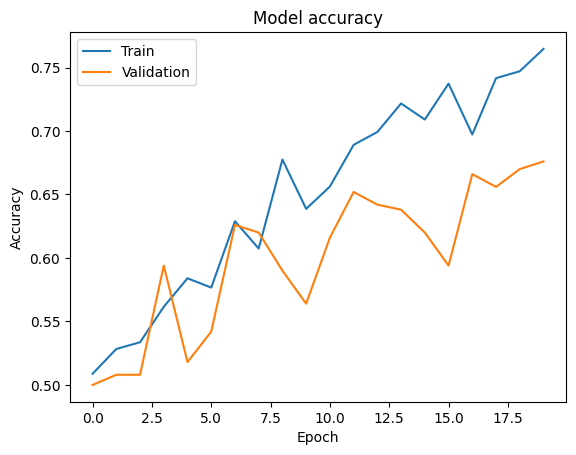

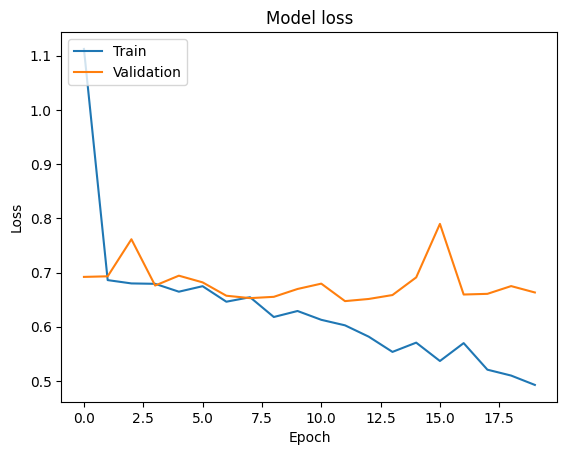

In [ ]:
#visualize the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


####Now let us compare model 7, 8 and 9 where the training sample being set to 3000

In [ ]:
Model_7 = (0.7854,0.5933)
Model_8 = (0.6605,0.5886)
Model_9 = (0.6050,0.6967)
Model_6 = (0.6624, 0.6370)

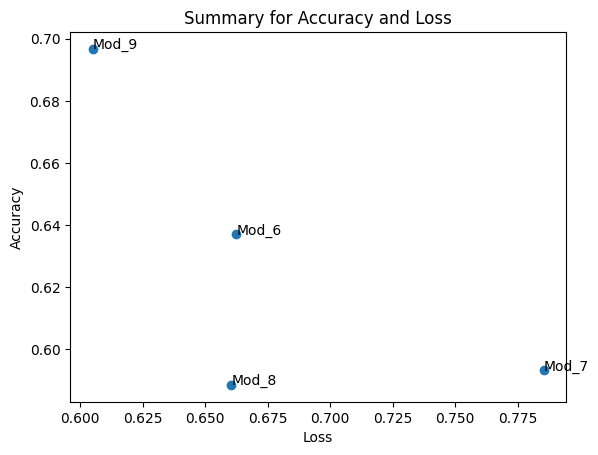

In [ ]:
Models_3 = ("Mod_6","Mod_7","Mod_8","Mod_9")
Loss_3 = (Model_6[0],Model_7[0],Model_8[0],Model_9[0])
Accuracy_3 = (Model_6[1],Model_7[1],Model_8[1],Model_9[1])

fig, ax = plt.subplots()
ax.scatter(Loss_3,Accuracy_3)
for i, txt in enumerate(Models_3):
    ax.annotate(txt, (Loss_3[i],Accuracy_3[i] ))
plt.title("Summary for Accuracy and Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")

plt.show()

##training sample 5000

In [ ]:
import os, shutil, pathlib

original_dir = pathlib.Path("train")
new_base_dir = pathlib.Path("/content/train")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname,
                            dst=dir / fname)

make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=1000, end_index=1250)
make_subset("test", start_index=1500, end_index=1750)

In [ ]:
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)



Found 5000 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [ ]:

for images, labels in train_dataset.take(1):
    print(f"Training dataset - Images shape: {images.shape}")
    print(f"Training dataset - Labels shape: {labels.shape}")


Training dataset - Images shape: (32, 150, 150, 3)
Training dataset - Labels shape: (32, 1)


In [ ]:
##data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])


###Model 10

In [ ]:

##building the model
model = models.Sequential()

model.add(layers.Input(shape=(150, 150, 3)))

model.add(data_augmentation)

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)            │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 15, 15, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_23 (MaxPooling2D)      │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_24 (Conv2D)                   │ (None, 5, 5, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_24 (MaxPooling2D)      │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,061,313 (4.05 MB)

 Trainable params: 1,061,313 (4.05 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
##training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=32
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 72s 2s/step - accuracy: 0.5030 - loss: 0.6964 - val_accuracy: 0.5840 - val_loss: 0.6843
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.5048 - loss: 0.6961 - val_accuracy: 0.5440 - val_loss: 0.6878
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 74s 2s/step - accuracy: 0.5564 - loss: 0.6862 - val_accuracy: 0.5340 - val_loss: 0.6826
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 75s 2s/step - accuracy: 0.5284 - loss: 0.6793 - val_accuracy: 0.5880 - val_loss: 0.6731
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 66s 2s/step - accuracy: 0.5238 - loss: 0.6965 - val_accuracy: 0.5740 - val_loss: 0.6773
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.5497 - loss: 0.6900 - val_accuracy: 0.5140 - val_loss: 0.6925
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 86s 3s/step - accuracy: 0.5300 - loss: 0.6914 - val_accuracy: 0.6380 - val_loss: 0.6727
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 84s 3s/step - accuracy: 0.5516 - loss: 0.6874 - val_accuracy: 0.5920 - val_loss:

In [ ]:
#evaluating the model
test_loss, test_acc = model.evaluate(test_dataset)
print(f"Test accuracy: {test_acc}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 7s 447ms/step - accuracy: 0.5362 - loss: 0.6845
Test accuracy: 0.5360000133514404


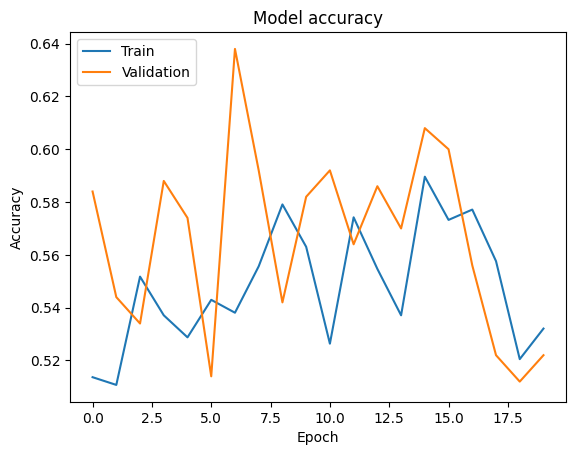

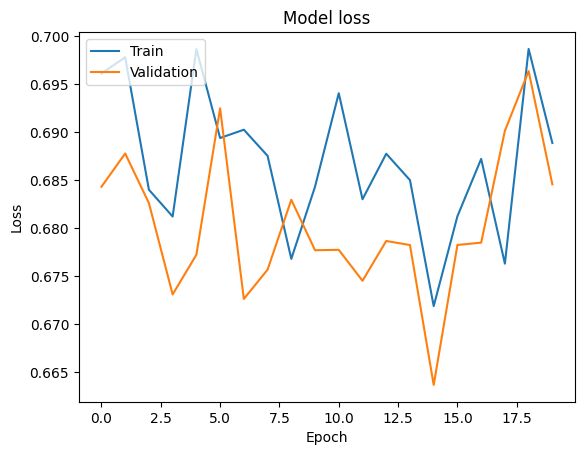

In [ ]:
##visualizing the model
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


###Conclusion: We have built Model 7, 8 and 9 with the sample size of 3000 whereas model 10 with the sample size 5000. let us compare the accuracy and loss of the four models.

In [ ]:
Model_7 = (0.7854,0.5933)
Model_8 = (0.6605,0.5886)
Model_9 = (0.6050,0.6967)
Model_10 = (0.6845, 0.5362)

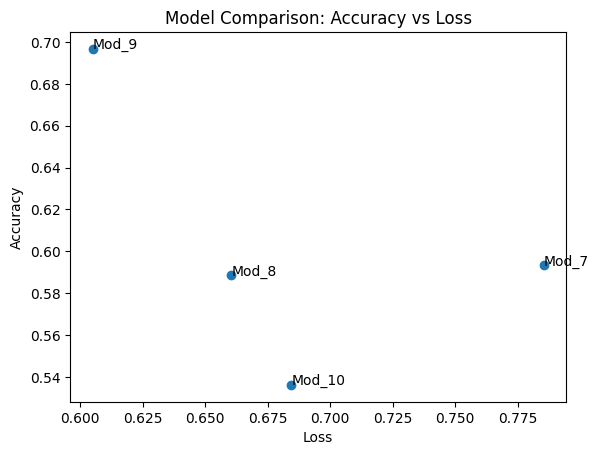

In [ ]:
import matplotlib.pyplot as plt

Models_4 = ["Mod_7", "Mod_8", "Mod_9", "Mod_10"]
Loss_4 = [Model_7[0], Model_8[0], Model_9[0], Model_10[0]]
Accuracy_4 = [Model_7[1], Model_8[1], Model_9[1], Model_10[1]]
fig, ax = plt.subplots()
ax.scatter(Loss_4, Accuracy_4)
for i, txt in enumerate(Models_4):
    ax.annotate(txt, (Loss_4[i], Accuracy_4[i]))
plt.title("Model Comparison: Accuracy vs Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")
plt.show()

##Scratch the model (Comparing all 10 models)


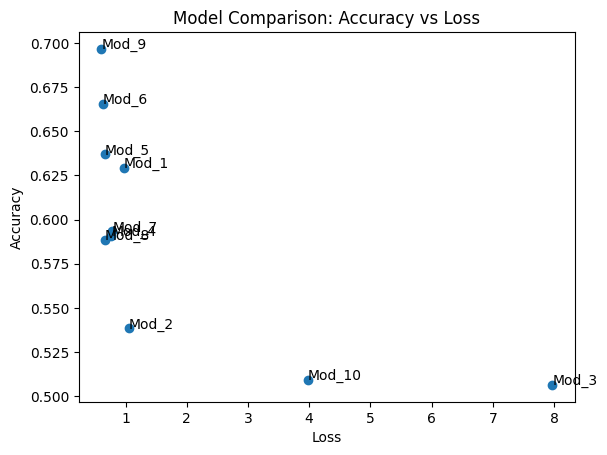

In [ ]:
import matplotlib.pyplot as plt

Model_1 = (0.9755, 0.6293)
Model_2 = (1.0589, 0.5384)
Model_3 = (7.9697, 0.5063)
Model_4 = (0.7679, 0.5909)
Model_5 = (0.6624, 0.6370)
Model_6 = (0.6267, 0.6657)
Model_7 = (0.7854, 0.5933)
Model_8 = (0.6605, 0.5886)
Model_9 = (0.6050, 0.6967)
Model_10 = (3.9820, 0.5093)


Models = ["Mod_1", "Mod_2", "Mod_3", "Mod_4", "Mod_5", "Mod_6", "Mod_7", "Mod_8", "Mod_9", "Mod_10"]
Loss = [Model_1[0], Model_2[0], Model_3[0], Model_4[0], Model_5[0], Model_6[0], Model_7[0], Model_8[0], Model_9[0], Model_10[0]]
Accuracy = [Model_1[1], Model_2[1], Model_3[1], Model_4[1], Model_5[1], Model_6[1], Model_7[1], Model_8[1], Model_9[1], Model_10[1]]

fig, ax = plt.subplots()
ax.scatter(Loss, Accuracy)

for i, txt in enumerate(Models):
    ax.annotate(txt, (Loss[i], Accuracy[i]))

plt.title("Model Comparison: Accuracy vs Loss")
plt.ylabel("Accuracy")
plt.xlabel("Loss")


plt.show()


###From the scatter plot comparing loss and accuracy for the 10 models, we can draw several insights:

Model 9 (Loss: 0.6050, Accuracy: 0.6967) appears to be the best performer, with the lowest loss and the highest accuracy among the models. This suggests that Model 9 is more effective at minimizing errors while achieving higher predictive accuracy.

Model 6 (Loss: 0.6267, Accuracy: 0.6657) and Model 5 (Loss: 0.6624, Accuracy: 0.6370) also perform relatively well, showing a balance between low loss and decent accuracy. They could be considered good options depending on other factors like complexity or computational cost.

Model 10 (Loss: 3.9820, Accuracy: 0.5093) and Model 3 (Loss: 7.9697, Accuracy: 0.5063) have very high loss and low accuracy, indicating that these models are underperforming. Their high error rates suggest they either overfitted or did not generalize well during training.

Model 2 and Model 1 also show moderate performance but are not as competitive as Models 5, 6, and 9. Their higher loss values suggest they may not be as optimized.

Model 9 is the best choice based on its low loss and highest accuracy, making it the most reliable model in this comparison.
Model 6 and Model 5 are also reasonable options with balanced performance.
Models like Model 10 and Model 3 should likely be discarded as they have high loss and low accuracy, signaling poor performance.

##4)Repeat Steps 1-3, but now using a pretrained network. The sample sizes you use inSteps 2 and 3 for the pretrained network may be the same or different from those usingthe network where you trained from scratch. Again, use any and all optimizationtechniques to get best performance.2Write a report summarizing your findings. What is the relationship between training samplesize and choice of network?

##Building the model 1 with training sample 1000

In [16]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

# Function to create dataset subsets
def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Create train, validation, and test sets with 1000, 500, 500 images respectively
make_subset("train", start_index=0, end_index=1000)
make_subset("validation", start_index=1000, end_index=1500)
make_subset("test", start_index=1500, end_index=2000)


In [18]:
import tensorflow as tf

# Set directory paths
train_dir = new_base_dir / "/content/cats_vs_dogs_small/train"
validation_dir = new_base_dir / "/content/cats_vs_dogs_small/validation"
test_dir = new_base_dir / "/content/cats_vs_dogs_small/test"

# Load the dataset from directories
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(150, 150),  # Image resize
    batch_size=32,          # Batch size
    label_mode="binary"     # Binary classification
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)


Found 10000 files belonging to 2 classes.
Found 3000 files belonging to 2 classes.
Found 4000 files belonging to 2 classes.


In [19]:
from tensorflow import keras
from tensorflow.keras import layers, models

conv_base = keras.applications.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(150, 150, 3)
)

conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [21]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=16
)



Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 452s 14s/step - accuracy: 0.8310 - loss: 16.9585 - val_accuracy: 0.9043 - val_loss: 4.6893
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 447s 14s/step - accuracy: 0.9219 - loss: 2.7724 - val_accuracy: 0.9062 - val_loss: 2.6464
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 447s 14s/step - accuracy: 0.9148 - loss: 2.6941 - val_accuracy: 0.9375 - val_loss: 1.0489
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 447s 14s/step - accuracy: 0.9031 - loss: 1.6863 - val_accuracy: 0.9492 - val_loss: 0.5687
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 445s 14s/step - accuracy: 0.9249 - loss: 0.7272 - val_accuracy: 0.9570 - val_loss: 0.3150
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9s/step - accuracy: 0.9190 - loss: 1.0155

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


32/32 ━━━━━━━━━━━━━━━━━━━━ 424s 13s/step - accuracy: 0.9189 - loss: 1.0144 - val_accuracy: 0.9477 - val_loss: 0.1968
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 447s 14s/step - accuracy: 0.9267 - loss: 0.3950 - val_accuracy: 0.9434 - val_loss: 0.4481
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 445s 14s/step - accuracy: 0.9284 - loss: 0.4480 - val_accuracy: 0.9473 - val_loss: 0.5965
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 446s 14s/step - accuracy: 0.9248 - loss: 0.9355 - val_accuracy: 0.9570 - val_loss: 0.1272
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 376s 12s/step - accuracy: 0.9265 - loss: 0.3716 - val_accuracy: 0.9648 - val_loss: 0.1422
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 469s 14s/step - accuracy: 0.9430 - loss: 0.3963 - val_accuracy: 0.9219 - val_loss: 0.6481
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 425s 13s/step - accuracy: 0.9540 - loss: 0.4448 - val_accuracy: 0.9523 - val_loss: 0.2262
Epoch 13/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 442s 14s/step - accuracy: 0.9252 - loss: 0.5447 - val_accuracy: 0.9609 - 

In [10]:
##evaluate the performance on test data set
test_loss, test_acc = model.evaluate(test_dataset, steps=16)
print(f"Test Accuracy: {test_acc}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 162s 10s/step - accuracy: 0.9064 - loss: 0.9632
Test Accuracy: 0.9453125


In [12]:
##visualize the model
import matplotlib.pyplot as plt

# Extract accuracy and loss from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Number of epochs
epochs = range(1, len(acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')  # Blue dots
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')  # Blue line
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'ro', label='Training loss')  # Red dots
plt.plot(epochs, val_loss, 'r', label='Validation loss')  # Red line
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Display the plots
plt.tight_layout()
plt.show()


NameError: name 'history' is not defined

##VGG model with 5000 training sample

In [17]:
import os, shutil, pathlib

original_dir = pathlib.Path("/content/train")
new_base_dir = pathlib.Path("cats_vs_dogs_small")

def make_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir = new_base_dir / subset_name / category
        os.makedirs(dir, exist_ok=True)
        fnames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fname in fnames:
            shutil.copyfile(src=original_dir / fname, dst=dir / fname)

# Creating subsets for training, validation, and testing
make_subset("train", start_index=0, end_index=2500)
make_subset("validation", start_index=2500, end_index=3000)
make_subset("test", start_index=3000, end_index=3500)


In [18]:
import tensorflow as tf

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "train",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "validation",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    new_base_dir / "test",
    image_size=(150, 150),
    batch_size=32,
    label_mode="binary"
)


Found 5000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [19]:
##building the model
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models

# Load the VGG16 network, with pre-trained ImageNet weights
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

# Freeze the convolutional base
conv_base.trainable = False

# Build the model
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [21]:
##training the model
history = model.fit(
    train_dataset,
    steps_per_epoch=32,
    epochs=20,
    validation_data=validation_dataset,
    validation_steps=16
)


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 446s 14s/step - accuracy: 0.9332 - loss: 0.5895 - val_accuracy: 0.9258 - val_loss: 0.6265
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 449s 14s/step - accuracy: 0.9084 - loss: 0.9017 - val_accuracy: 0.9139 - val_loss: 0.5332
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10s/step - accuracy: 0.9244 - loss: 0.4386

AttributeError: 'NoneType' object has no attribute 'items'